# Features Selection from multiple Features:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cardio_train.csv",sep =";")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
x_features = df.iloc[:, :-1]
x_features

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0,18393,2,168,62.0,110,80,1,1,0,0,1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0


In [4]:
y_label = df.iloc[:, -1]
y_label

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [6]:
from sklearn.feature_selection import SelectKBest

In [12]:
from sklearn.feature_selection import f_classif

In [13]:
feature_filter = SelectKBest(score_func=f_classif)

In [15]:
feature_filter.fit(x_features,y_label)

SelectKBest()

In [27]:
score_col = pd.DataFrame(feature_filter.scores_,columns = ["score"])

In [28]:
score_col

,score
0,1.010461
1,4209.007957
2,4.603641
3,8.197397
4,2388.777887
5,208.339524
6,303.629011
7,3599.361137
8,562.772977
9,16.790541


In [29]:
name_col = pd.DataFrame(x_features.columns)

In [30]:
new_score = pd.concat([name_col,score_col],axis = 1)

In [31]:
new_score

,0,score
0,id,1.010461
1,age,4209.007957
2,gender,4.603641
3,height,8.197397
4,weight,2388.777887
5,ap_hi,208.339524
6,ap_lo,303.629011
7,cholesterol,3599.361137
8,gluc,562.772977
9,smoke,16.790541


In [32]:
new_score.nlargest(8,score_col) #Final column Filtration(top 8)

,0,score
1,age,4209.007957
7,cholesterol,3599.361137
4,weight,2388.777887
8,gluc,562.772977
6,ap_lo,303.629011
5,ap_hi,208.339524
11,active,89.091494
9,smoke,16.790541


In [33]:
x_features

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0,18393,2,168,62.0,110,80,1,1,0,0,1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0


In [41]:
x_features #already id column dropped

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


In [53]:
x_features

,age,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,62.0,110,80,1,1,0,0,1
1,20228,85.0,140,90,3,1,0,0,1
2,18857,64.0,130,70,3,1,0,0,0
3,17623,82.0,150,100,1,1,0,0,1
4,17474,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
69995,19240,76.0,120,80,1,1,1,0,1
69996,22601,126.0,140,90,2,2,0,0,1
69997,19066,105.0,180,90,3,1,0,1,0
69998,22431,72.0,135,80,1,2,0,0,0


In [54]:
x_features.drop(["alco"],axis=1)

,age,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,active
0,18393,62.0,110,80,1,1,0,1
1,20228,85.0,140,90,3,1,0,1
2,18857,64.0,130,70,3,1,0,0
3,17623,82.0,150,100,1,1,0,1
4,17474,56.0,100,60,1,1,0,0
...,...,...,...,...,...,...,...,...
69995,19240,76.0,120,80,1,1,1,1
69996,22601,126.0,140,90,2,2,0,1
69997,19066,105.0,180,90,3,1,0,0
69998,22431,72.0,135,80,1,2,0,0


In [55]:
y_label

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [56]:
x_features

,age,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,62.0,110,80,1,1,0,0,1
1,20228,85.0,140,90,3,1,0,0,1
2,18857,64.0,130,70,3,1,0,0,0
3,17623,82.0,150,100,1,1,0,0,1
4,17474,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
69995,19240,76.0,120,80,1,1,1,0,1
69996,22601,126.0,140,90,2,2,0,0,1
69997,19066,105.0,180,90,3,1,0,1,0
69998,22431,72.0,135,80,1,2,0,0,0


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_featurestrain,x_featurestest,y_labeltrain,y_labeltest = train_test_split(x_features,y_label,test_size = .25,random_state =1)

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
r = RandomForestClassifier()

In [61]:
r.fit(x_featurestrain,y_labeltrain)

RandomForestClassifier()

In [62]:
r.predict(x_featurestest)

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [63]:
r.score(x_featurestest,y_labeltest)

0.696

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dct = DecisionTreeClassifier()

In [66]:
dct.fit(x_featurestrain,y_labeltrain)

DecisionTreeClassifier()

In [67]:
dct.score(x_featurestest,y_labeltest)

0.6350285714285714

In [68]:
import pickle as pk

In [70]:
with open("Model3_final","wb") as file:
    pk.dump(r,file)

# Features importance:

In [72]:
from sklearn.ensemble import ExtraTreesClassifier 

In [73]:
model = ExtraTreesClassifier()

In [74]:
model.fit(x_features,y_label)

ExtraTreesClassifier()

In [75]:
model.feature_importances_

array([0.43650967, 0.20059411, 0.18569562, 0.10945003, 0.04496252,
       0.01067034, 0.00430284, 0.00375201, 0.00406286])

In [77]:
top = pd.Series(model.feature_importances_,index = x_features.columns)

In [78]:
top

age            0.436510
weight         0.200594
ap_hi          0.185696
ap_lo          0.109450
cholesterol    0.044963
gluc           0.010670
smoke          0.004303
alco           0.003752
active         0.004063
dtype: float64

<AxesSubplot:>

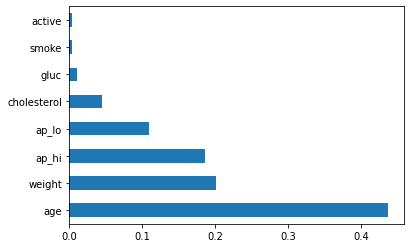

In [82]:
top.nlargest(8).plot(kind="barh")